In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import fitsio
from desitarget.cmx import cmx_targetmask
import desimodel.focalplane
%matplotlib inline

In [2]:
# reference to tile description https://desi.lbl.gov/trac/wiki/TargetSelectionWG/miniSV2
# path to data http://www.astro.utah.edu/~u6022465/SV/miniSV/

In [3]:
tile_files = {}
tile_files[0] = 'www.astro.utah.edu/~u6022465/SV/miniSV/Tile_70500/fiberassign-070500.fits' # 119.00	50.00	Nothing in particular here, but higher declination
tile_files[1] = 'www.astro.utah.edu/~u6022465/SV/miniSV/Tile_70501/fiberassign-070501.fits' # 135.00	0.50	GAMA-G09
tile_files[2] = 'www.astro.utah.edu/~u6022465/SV/miniSV/Tile_70502/fiberassign-070502.fits' # 180.00	-0.50	GAMA-G12
tile_files[3] = 'www.astro.utah.edu/~u6022465/SV/miniSV/Tile_70503/fiberassign-070503.fits' # 217.50	0.50	GAMA-G15
tile_files[4] = 'www.astro.utah.edu/~u6022465/SV/miniSV/Tile_70508/fiberassign-070508.fits' # 195.00	29.00	Coma on petal 0

In [4]:
area = np.pi*desimodel.focalplane.get_tile_radius_deg()**2
for i in range(5):
    print("TILE ", i)
    assigned = Table(fitsio.read(tile_files[i], ext='FIBERASSIGN'))
    print('MINI_SV_BGS_BRIGHT density (targets/deg^2)', 
          np.count_nonzero((assigned['CMX_TARGET']&cmx_targetmask.cmx_mask.mask('MINI_SV_BGS_BRIGHT'))!=0)/area)
    print('MINI_SV_BGS_BRIGHT', np.count_nonzero((assigned['CMX_TARGET']&cmx_targetmask.cmx_mask.mask('MINI_SV_BGS_BRIGHT'))!=0))
    print('STANDARDS',np.count_nonzero((assigned['CMX_TARGET']&cmx_targetmask.cmx_mask.mask('STD_GAIA'))!=0))
    print('SKY', np.count_nonzero(assigned['OBJTYPE']=='SKY'))
    print()

TILE  0
MINI_SV_BGS_BRIGHT density (targets/deg^2) 208.5055940454409
MINI_SV_BGS_BRIGHT 1735
STANDARDS 1492
SKY 469

TILE  1
MINI_SV_BGS_BRIGHT density (targets/deg^2) 218.3600371069545
MINI_SV_BGS_BRIGHT 1817
STANDARDS 1568
SKY 409

TILE  2
MINI_SV_BGS_BRIGHT density (targets/deg^2) 257.297104813423
MINI_SV_BGS_BRIGHT 2141
STANDARDS 931
SKY 639

TILE  3
MINI_SV_BGS_BRIGHT density (targets/deg^2) 247.6830140217024
MINI_SV_BGS_BRIGHT 2061
STANDARDS 1211
SKY 426

TILE  4
MINI_SV_BGS_BRIGHT density (targets/deg^2) 255.01375825038937
MINI_SV_BGS_BRIGHT 2122
STANDARDS 687
SKY 767



Text(0.5,1,'SKY')

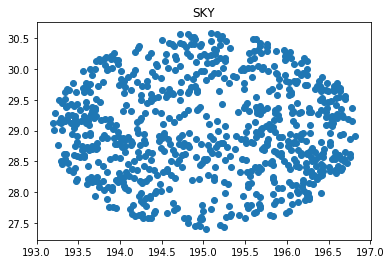

In [9]:
sky = assigned['OBJTYPE']=='SKY'
plt.scatter(assigned['TARGET_RA'][sky], assigned['TARGET_DEC'][sky])
plt.title("SKY")

In [5]:
for i in set(assigned['CMX_TARGET']):
    print(i, cmx_targetmask.cmx_mask.names(i))

72057594037928192 ['SV0_BGS', 'MINI_SV_BGS_BRIGHT']
513 ['STD_GAIA', 'SV0_MWS']
81064793292670208 ['SV0_BGS', 'SV0_LRG', 'MINI_SV_LRG', 'MINI_SV_BGS_BRIGHT']
256 ['SV0_BGS']
1280 ['SV0_BGS', 'SV0_LRG']
9007199254742272 ['SV0_BGS', 'SV0_LRG', 'MINI_SV_LRG']
512 ['SV0_MWS']
72057594037929216 ['SV0_BGS', 'SV0_LRG', 'MINI_SV_BGS_BRIGHT']
0 []
4352 ['SV0_BGS', 'SV0_QSO']
520 ['STD_TEST', 'SV0_MWS']
36028797018968320 ['SV0_BGS', 'SV0_QSO', 'MINI_SV_QSO']
108086391056896256 ['SV0_BGS', 'SV0_QSO', 'MINI_SV_QSO', 'MINI_SV_BGS_BRIGHT']
8193 ['STD_GAIA', 'SV0_WD']
36028797018968576 ['SV0_MWS', 'SV0_QSO', 'MINI_SV_QSO']
8704 ['SV0_MWS', 'SV0_WD']
768 ['SV0_BGS', 'SV0_MWS']
544 ['STD_DITHER', 'SV0_MWS']
8737 ['STD_GAIA', 'STD_DITHER', 'SV0_MWS', 'SV0_WD']
545 ['STD_GAIA', 'STD_DITHER', 'SV0_MWS']
8225 ['STD_GAIA', 'STD_DITHER', 'SV0_WD']
8589935139 ['STD_GAIA', 'SV0_STD_FAINT', 'STD_DITHER', 'SV0_MWS', 'STD_FAINT']
108086391056896289 ['STD_GAIA', 'STD_DITHER', 'SV0_BGS', 'SV0_QSO', 'MINI_SV_QSO', '

In [6]:
cmx_targetmask.cmx_mask.names

<bound method BitMask.names of cmx_mask:
  - [STD_GAIA,         0, "Gaia stars used for dithering (and other) tests", {'obsconditions': 'DARK|GRAY|BRIGHT', 'priorities': {'UNOBS': 2400, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 2400, 'MORE_ZGOOD': 2400}, 'numobs': 1}]
  - [SV0_STD_FAINT,    1, "SV-like STD_FAINT class is set (very early SV selection)", {'obsconditions': 'DARK|GRAY', 'priorities': {'UNOBS': 2600, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 2600, 'MORE_ZGOOD': 2600}, 'numobs': 1}]
  - [SV0_STD_BRIGHT,   2, "SV-like STD_BRIGHT class is set (very early SV selection)", {'obsconditions': 'BRIGHT', 'priorities': {'UNOBS': 2600, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 2600, 'MORE_ZGOOD': 2600}, 'numobs': 1}]
  - [STD_TEST,         3, "Very bright stars for early tests", {'obsconditions': 'DARK|GRAY|BRIGHT', 'priorities': {'UNOBS': 2800, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 2800, 'MORE_ZGOOD': 2800}, 'numobs': 1}]
  - [STD_CA

In [7]:
assigned

TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,PMRA_IVAR,PMDEC_IVAR,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,NUMTARGET,PRIORITY,SUBPRIORITY,OBSCONDITIONS,NUMOBS_MORE,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,TARGET_RA_IVAR,TARGET_DEC_IVAR,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,FRACDEV,FRACDEV_IVAR,SHAPEDEV_R,SHAPEDEV_E1,SHAPEDEV_E2,SHAPEDEV_R_IVAR,SHAPEDEV_E1_IVAR,SHAPEDEV_E2_IVAR,SHAPEEXP_R,SHAPEEXP_E1,SHAPEEXP_E2,SHAPEEXP_R_IVAR,SHAPEEXP_E1_IVAR,SHAPEEXP_E2_IVAR,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PHOTSYS,CMX_TARGET,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL,BLOBDIST,FIBERFLUX_IVAR_G,FIBERFLUX_IVAR_R,FIBERFLUX_IVAR_Z,DESI_TARGET,BGS_TARGET,MWS_TARGET
int64,int16,int32,int32,int32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int16,int32,float64,int32,int32,int16,int32,bytes8,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32,float32,bytes1,int64,int64,int64,int64,float32,float32,float32,float32,int64,int64,int64
35186406288527150,0,311,311,0,0,194.63558458730358,27.849730072959805,0.0,0.0,0.0,0.0,2015.5,5400.0,72057594037928192,1,TGT,80.033066,-286.29184,0,5000,0.6840949703844765,65535,99,8000,484991,1945p277,3886,DEV,5048879300000.0,6146934000000.0,0.011746373,33.55225,92.12413,174.95753,133.81346,34.292744,23.75765,0.9658259,0.97684944,0.9869839,0.00014352404,0.00011225485,0.00015128912,0.006169898,0.004555165,0.01789086,0.7504756,0.75019646,0.9984992,3,3,6,1186.984,449.07578,159.77432,721.068,255.61717,91.969826,157.54828,106.078285,40.858906,666.86676,2.4827454,0.45813513,0.00082128984,1.1310158e-05,0.9980113,0.9987782,0.9997393,0.99990153,0,0,0,10.656796,29.260277,55.569656,10.65688,29.260471,55.57,0,0,0,1.0,1.0,1.3693153,0.2437956,-0.16766216,161432.11,453155.06,358092.47,0.0,0.0,0.0,0.0,0.0,0.0,1463714516491373056,G2,19.520859,120.670135,18.959503,37.68988,17.409311,89.64975,4.2083626,13.097404,False,3.2868524,True,0.0,0.0,S,72057594037928192,2101,1,10400,0.0,0.0,0.0,0.0,0,0,0
35186411640455386,0,272,272,1,0,194.7278543751976,27.885173900838357,0.0,0.0,0.0,0.0,0.0,5400.0,72057594037928192,1,TGT,59.58135,-276.92264,0,5000,0.9880160227760632,65535,99,8000,486267,1948p280,218,DEV,4662752000000.0,3674538000000.0,0.014303101,12.972841,37.556095,74.24197,333.71008,96.38988,25.39438,0.9585437,0.9718819,0.9841733,0.00013049916,4.71846e-05,0.0047450964,0.016589474,0.016377253,0.01625308,0.9259103,0.99481356,0.80002,4,4,4,1482.1458,580.4391,116.88532,1019.66